### Aim: To detect a subject is wearing glasses or not
Can be done easily by detecting the presence of a nose bridge in a pair of glasses

### Steps

- Get the facial landmark coordinates for the nasal area
- Crop the Image base on these landmarks
- Convert the image into black and white (White being the background and black being the details)
- Look of the presence a nasal strip in the nose (A strip of 0s (black pixels))
- If present than the subject is wearing glasses



### The libraries needed

In [21]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import statistics

### The face detection model 

In [22]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

### Facial Landmarks 

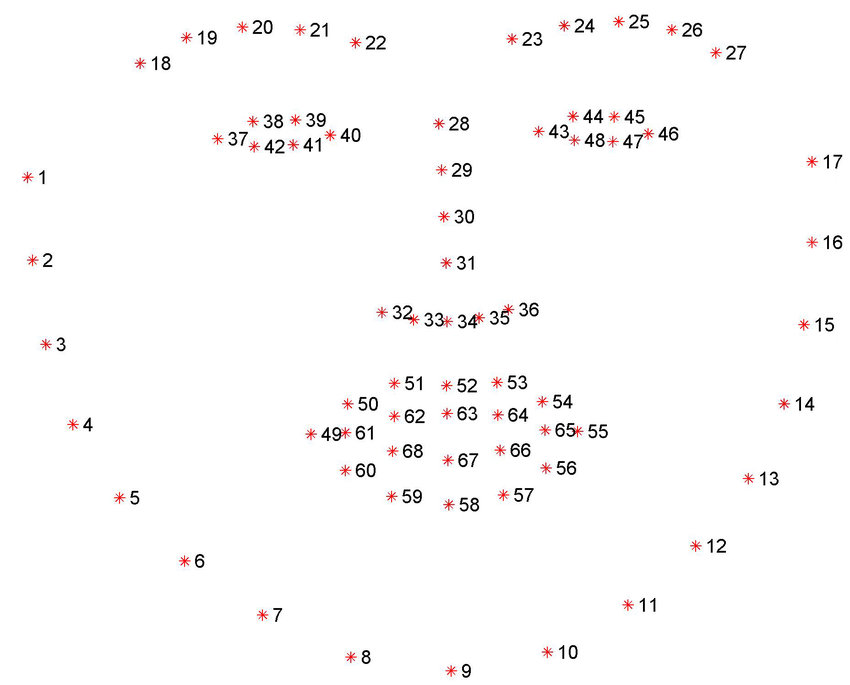

In [23]:
img = Image.open("Test_images/68-facial-landmarks.png")
img

### Test image

In [24]:
ls

Glasses_detection-Real_Time.ipynb      haarcascade_frontalface_alt2.xml
Glasses_detection.ipynb                shape_predictor_68_face_landmarks.dat
Test_Images/                           temp.jpeg


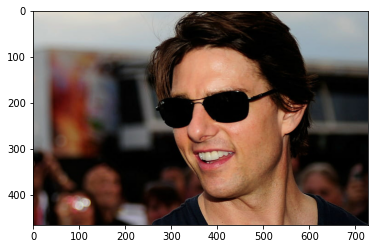

In [25]:
path = 'Test_Images/tom_glasses.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

rect = detector(img)[0]
sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])

nose_bridge_x = []
nose_bridge_y = []

In [26]:
nose_bridge_x = []
nose_bridge_y = []

for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])
        
        
### x_min and x_max
x_min = min(nose_bridge_x)
x_max = max(nose_bridge_x)

### ymin (from top eyebrow coordinate),  ymax
y_min = landmarks[20][1]
y_max = landmarks[31][1]

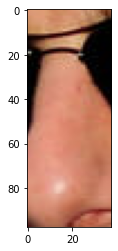

In [27]:
img2 = Image.open(path)
img2 = img2.crop((x_min,y_min,x_max,y_max))
plt.imshow(img2)

Glasses are present


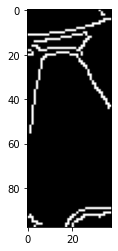

In [28]:
img_blur = cv2.GaussianBlur(np.array(img2),(3,3), sigmaX=0, sigmaY=0)

edges = cv2.Canny(image =img_blur, threshold1=100, threshold2=200)
plt.imshow(edges, cmap =plt.get_cmap('gray'))

edges_center = edges.T[(int(len(edges.T)/2))]

if 255 in edges_center:
    print("Glasses are present")
else:
        print("Glasses are absent")

### Everything together in a function

In [29]:
def glasses_detector(path):
   
    img = dlib.load_rgb_image(path)
    
    if len(detector(img))==0:
        return('No face detected')
    rect = detector(img)[0]
    sp = predictor(img, rect)
    landmarks = np.array([[p.x, p.y] for p in sp.parts()])

    nose_bridge_x = []
    nose_bridge_y = []

    for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])

    ### x_min and x_max
    x_min = min(nose_bridge_x)
    x_max = max(nose_bridge_x)

    ### ymin (from top eyebrow coordinate),  ymax
    y_min = landmarks[20][1]
    y_max = landmarks[30][1]

    img2 = Image.open(path)
    img2 = img2.crop((x_min,y_min,x_max,y_max))

    img_blur = cv2.GaussianBlur(np.array(img2),(3,3), sigmaX=0, sigmaY=0)

    edges = cv2.Canny(image =img_blur, threshold1=100, threshold2=200)

    edges_center = edges.T[(int(len(edges.T)/2))]

    if 255 in edges_center:
        return(1)
    else:
        return(0)

### Looking at other test images

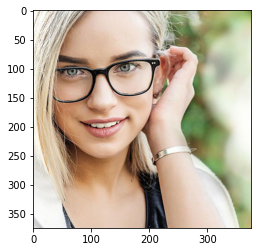

In [34]:
path = 'Test_Images/Womens_Prescription_Eyeglasses.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

In [35]:
glasses_detector(path)

1

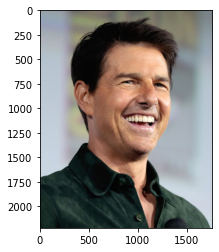

In [30]:
path = 'Test_Images/tom_cruise.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

In [31]:
glasses_detector(path)

0

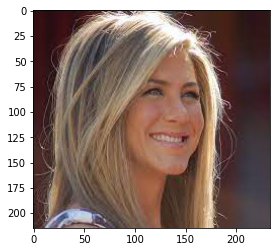

In [32]:
path = 'Test_Images/jen-an.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

In [18]:
glasses_detector(path)

0

### Do I have Glasses?

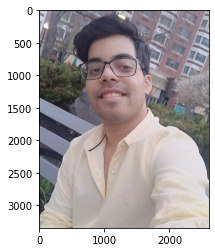

In [19]:
path = 'Test_Images/me.jpg'
img = dlib.load_rgb_image(path)
plt.imshow(img)
    

In [20]:
glasses_detector(path)

1

### Yep...